In [4]:
import rosbag
import rosbag_pandas
import numpy as np

In [5]:
dataframe = rosbag_pandas.bag_to_dataframe('data.bag') 
dataframe.head(2)

,pose__pose_position_x,pose__pose_position_y,pose__pose_position_z,pose__pose_orientation_x,pose__pose_orientation_y,pose__pose_orientation_z,pose__pose_orientation_w
2018-10-06 16:19:48.521916160,0.002636,0.007749,0.282685,0.434197,0.744306,0.507427,-0.090263
2018-10-06 16:19:48.533524480,0.002636,0.007749,0.282685,0.434195,0.744314,0.507417,-0.090264


In [6]:
dataframe = dataframe.dropna()
len(dataframe)

300

In [7]:
import ipympl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [8]:
x = dataframe.pose__pose_position_x
y = dataframe.pose__pose_position_y
z = dataframe.pose__pose_position_z

In [9]:
%matplotlib notebook

In [10]:
# import numpy as np
# from matplotlib import cm

# plt.rcParams['figure.figsize'] = [10, 8]
# X = np.arange(0, 5, 0.25)
# Y = np.arange(0, 5, 0.25)

# X, Y = np.meshgrid(X, Y)

# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# # ax.plot3D(x, y, z)
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
# plt.show()

In [11]:
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)

<IPython.core.display.Javascript object>


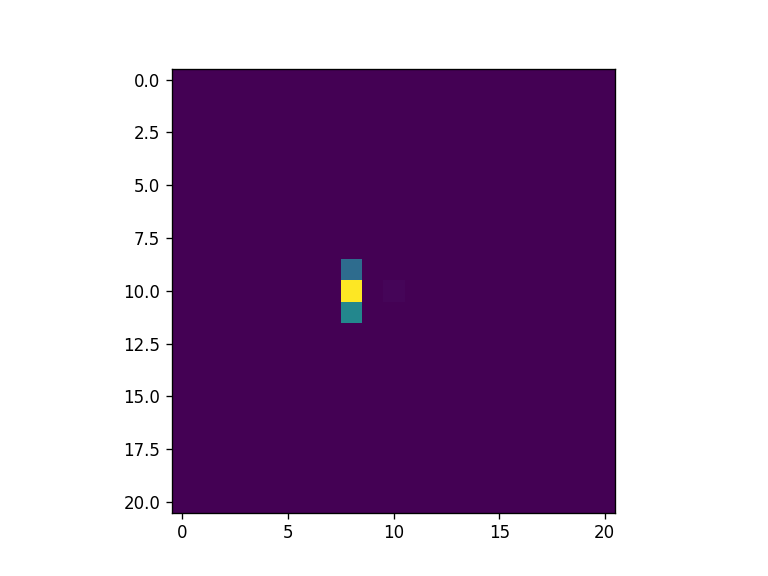

In [12]:
world = np.zeros((X.shape[0] + 1, Y.shape[0] + 1))
fig = plt.figure()

plt.rcParams['figure.figsize'] = [8, 5]

for x_, y_ in zip(x,y):
    xi = np.digitize(x_, X) - 1
    yi = np.digitize(y_, Y) - 1
    world[xi, yi] += 1    
    
world /= len(x)
world = world.T
plt.imshow(world * 255)
plt.show()